In [1]:
import sys
sys.path.append("..")
import Data as dt
import ChevalParesseux_lib as lib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# **I. Import Data**

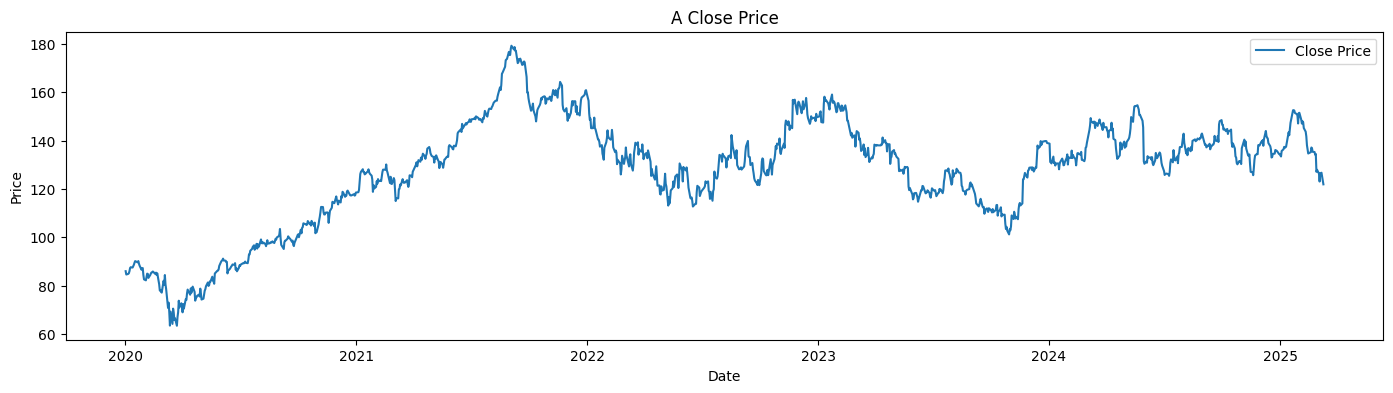

In [2]:
# ======= I. Load Data =======
data = dt.load_data(ticker='A')
data = data[data['date'] > '2020-01-01']
data.index = pd.to_datetime(data['date'])

alt_data = dt.load_data(ticker='AAPL')
alt_data = alt_data[alt_data['date'] > '2020-01-01']
alt_data.index = pd.to_datetime(alt_data['date'])

# ======= II. Plot Data to ensure its integrity =======
plt.figure(figsize=(17, 4))
plt.plot(data['close'], label='Close Price')
plt.title('A Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# **II. Prepare feature class**

In [3]:
# ======= I. User Defining Parameters =======
labeller_model = lib.slope_labeller
labeller_params = {
    # "upper_barrier": [1],
    # "lower_barrier": [1],
    # "vertical_barrier": [20],
    # "vol_window": [20],
    # "window_lookForward": [10],
    # "min_trend_size": [5],
    # "volatility_threshold": [1],
    "horizon": [10],
    "horizon_extension": [1.5],
    # "r2_threshold": [0.65],
    "min_trend_size": [5],
    "smoothing_method": ['ewma'],
    "window_smooth": [5],
    "lambda_smooth": [0.2],
}

n_jobs = 10

In [4]:
# ======= II. Initialize =======
labeller = labeller_model(n_jobs=n_jobs)

# ======= III. Set the Parameters =======
labeller = labeller.set_params(**labeller_params)

# **III. Checking Smoothing/Preprocessing Method**

In [5]:
# smoothed_data_ewma = feature.smooth_data(data=data['close'], smoothing_method='ewma', window_smooth=10, lambda_smooth=0.2)
# smoothed_data_ma = feature.smooth_data(data=data['close'], smoothing_method='average', window_smooth=10, lambda_smooth=0.2)

# processed_data = feature.process_data(data=smoothed_data_ewma)

# plt.figure(figsize=(17, 4))
# plt.plot(data['close'], label='Close Price')
# plt.plot(smoothed_data_ewma, label='Smoothed Close Price using EWMA', color='orange')
# plt.plot(smoothed_data_ma, label='Smoothed Close Price using MA', color='green')
# plt.plot(processed_data, label='Processed Data', color='red')
# plt.title('A Close Price')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.legend()
# plt.show()

# **IV. Checking Extraction**

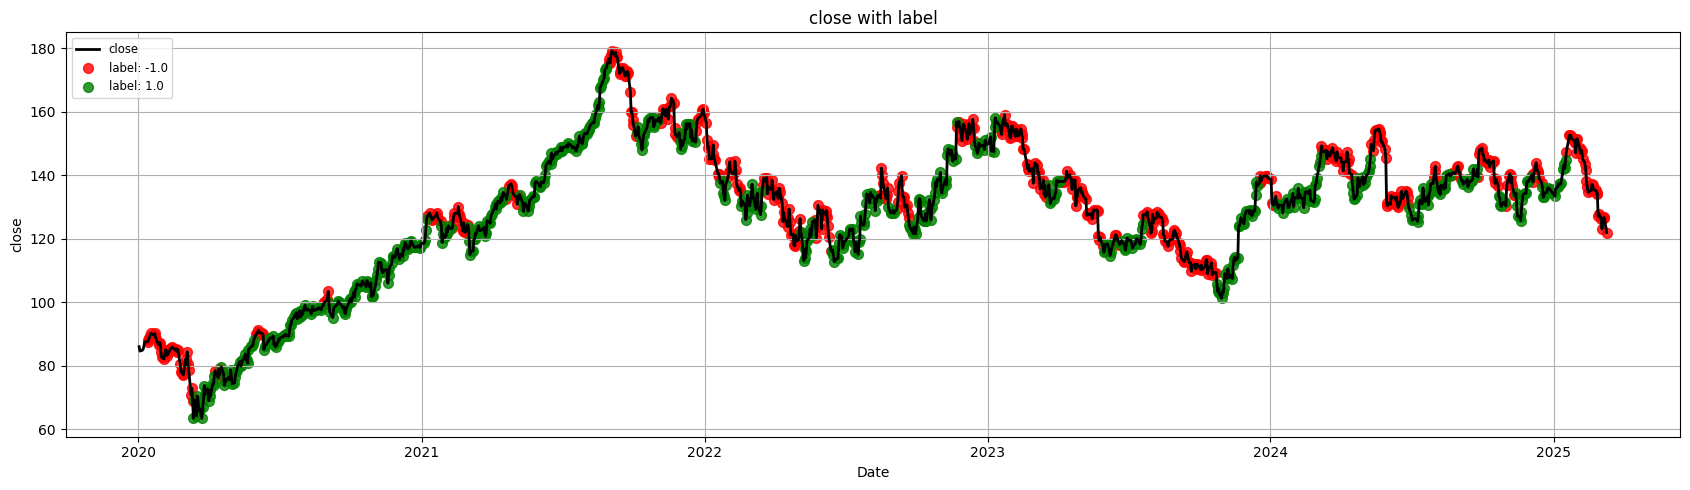

In [6]:
labels_df = labeller.extract(data=data['close'])

lib.plot_series_labels(series=data['close'], label_series=labels_df['set_0'])